**Importing Dependencies**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist

**Loading MNIST data from keras dataset**



In [2]:
# loading data onto X_train, Y_train, X_test, Y_test
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# checking the type of X_train
type(X_train)

numpy.ndarray

In [4]:
# dimensions of X_train, Y_train, X_test, Y_test
# we have 60000 images and each image is a 28*28 image and it's a greyscale image
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
# printing the 11th image from X_train
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
# shape of 11th image
X_train[10].shape

(28, 28)

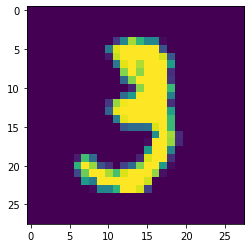

3


In [7]:
# displaying the image
plt.imshow(X_train[10])
plt.show()

# printing the label
print(Y_train[10])

**Image Labels Analysis**

In [8]:
# printing shape
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [9]:
# printing unique labels in Y_train and Y_test
print(np.unique(Y_train), np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8 9]


In [10]:
# scaling the values
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [11]:
# printing 10th image from X_train_scaled
print(X_train_scaled[9])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building the Neural Network!**

In [12]:
# setting up the layers of our neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(units = 50, activation = 'relu'),
    keras.layers.Dense(units = 50, activation = 'relu'),
    keras.layers.Dense(units = 10, activation = 'sigmoid')
])

In [13]:
# compiling the neural network
model.compile(optimizer = 'Adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [14]:
# training the neural network
model.fit(X_train_scaled, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0835 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0685 - accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0609 - accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9838
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0458 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0402 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

**Accuracy on Test Data**

In [15]:
# getting loss and accuracy over test data
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1040 - accuracy: 0.9710


In [16]:
# printing shape of X_test
X_test_scaled.shape

(10000, 28, 28)

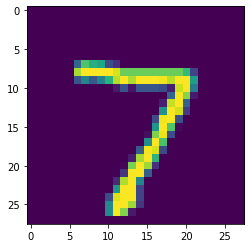

In [17]:
# first data point in test data
plt.imshow(X_test_scaled[0])

In [18]:
# priting true label (Y)
print(Y_test[0])

7


In [19]:
# seeing what the model predicts
prediction = model.predict(X_test_scaled)
print(prediction[0]) # model.predict for neural networks gives prediction probability for each class (0 - 9) for this data-point
print(np.argmax(prediction[0])) # use argmax to get the label

[3.5130084e-03 6.7106444e-01 6.6638464e-01 8.5868883e-01 6.2501094e-05
 9.0813637e-04 4.0907306e-08 9.9999774e-01 1.3417095e-02 6.5949798e-02]
7


In [20]:
# creating a list of predicted labels for test_data
predicted_labels = [np.argmax(i) for i in prediction]

In [21]:
# printing first 5 predicted_labels
print(predicted_labels[0:6])

[7, 2, 1, 0, 4, 1]


**Confusion Matrix**

In [22]:
# building a confusion matrix
conf_mat = tf.math.confusion_matrix(Y_test, predicted_labels)

In [23]:
# printing it...haha...
print(conf_mat)

tf.Tensor(
[[ 969    1    1    0    1    1    2    2    3    0]
 [   0 1122    1    2    0    4    2    0    4    0]
 [   5    0  999    1    7    1    2    6   11    0]
 [   0    0    5  966    0   23    0    3    7    6]
 [   0    0    2    0  968    1    4    2    1    4]
 [   2    0    0    4    2  878    4    1    1    0]
 [   6    1    0    0    8   11  929    0    3    0]
 [   1    5    9    0    5    0    0  994    8    6]
 [   2    0    3    6    6   10    2    2  943    0]
 [   3    4    0    8   24   10    1    7   10  942]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

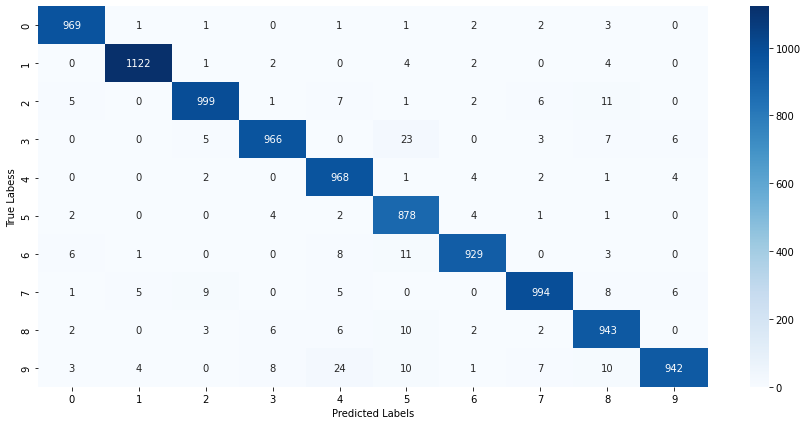

In [24]:
# making a heat-map
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Labess')
plt.xlabel('Predicted Labels')

**Making a Predictive System**

Enter image path: /content/images-1.png
[[6.3001460e-01 3.4605211e-05 5.8849216e-02 2.3198128e-04 6.0708094e-01
  7.2579741e-01 9.9872422e-01 2.1415324e-05 1.5175343e-04 7.0231904e-06]]


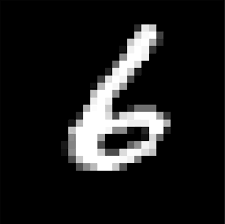

The image is :  6


In [25]:
# accepting input path
input_image_path = input("Enter image path: ")

# converting image to numpy array
input_image = cv2.imread(input_image_path)

# converting it to a greyscale image
input_image_grey = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

# reshaping the image
input_image_grey_final = cv2.resize(input_image_grey, (28,28))

# scaling the image
input_image_scaled = input_image_grey_final / 255
input_image_reshaped = np.reshape(input_image_scaled, [1,28,28])

# getting the prediction
prediction = model.predict(input_image_reshaped)
print(prediction)

# printing output
cv2_imshow(input_image)
print("The image is : ", np.argmax(prediction))